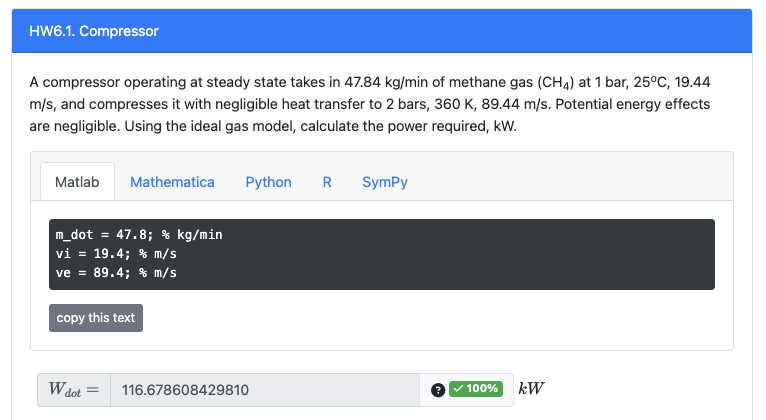

In [ ]:
# 6.1
# 思路 跟p没关系
# W_dot=-m_dot*(derta_h+derta_ke)
# cp求取的公式推导见p125，p133（我在resoureces里面提供的版本的）

# derta_h=cp*(T2-T1) cp是气体定呀比热容
# derta_ke=1/2*(v2**2-v1**2)/1000 
# 易错 注意单位dertah算出来就是kj/kg 但是derta_ke算出来是j/kg
# 易错 注意w是否带负号的
# cp就是用表a21计算

from sympy import *

from sympy import *

m_dot = 47.8
vi = 19.4
ve = 89.4 

T1=25+273.15
T2=360
# T2=1000
T=S('T')
def cal_cp(T):
    return (3.826-3.979*1e-3*T+24.558*1e-6*T**2-22.733*1e-9*T**3+6.963*1e-12*T**4)*8.314/16.04
cp=cal_cp(T)
print(cp.subs(T,300))
# cp=2.254
# ===============



m_dot=m_dot/60 # kg/s

derta_h=integrate(cp,(T,T1,T2))
derta_ke=1/2*(ve**2-vi**2)/1000

W_dot=m_dot*(derta_h+derta_ke)
print(W_dot)

2.22110754365337
116.678608429810


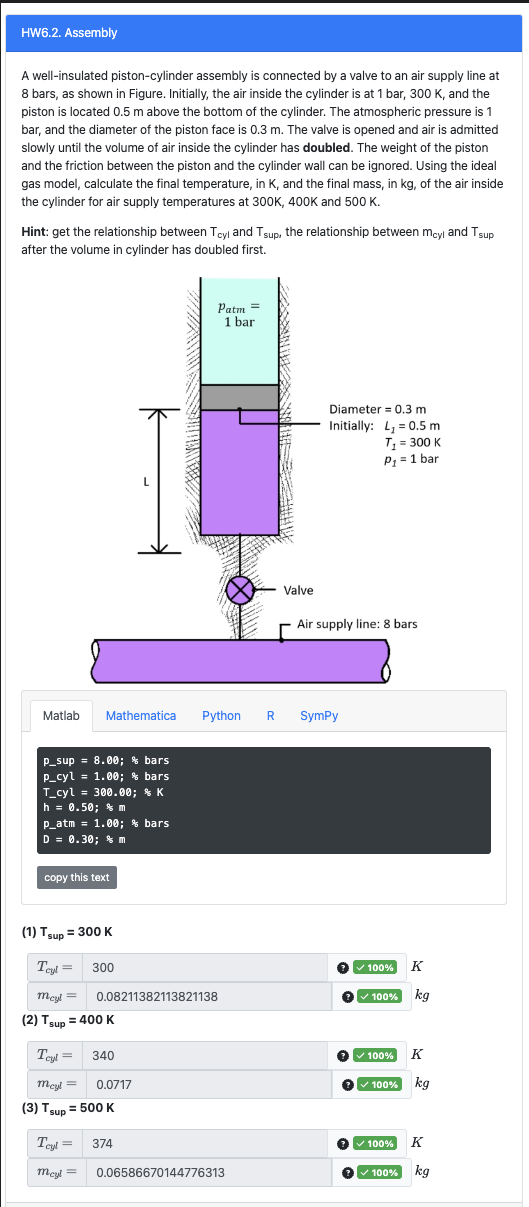

In [2]:
# 6.2
# table看p963 A-22
# 简单公式 m2*u2-m1*u1=-p*(v2-v1)+hi*(m2-m1)
# 然后idea gas公式是为了关联T和m m=p*V/R/T

from sympy import *
T1=300
p1=1e5

V1=(0.3)**2/4*pi*0.5
V2=V1*2

p2=1e5
R=8314/28.97

T2=S('T2')
m1=p1*V1/R/T1
m2=p2*V2/R/T2

u1=214.07
u2=(T2-300)*(214.07-210.49)/5+214.07



for Tsup in (300,400,500):
    hsup=Tsup
    q1=m2*u2-m1*u1+p1*(V2-V1)/1e3-(m2-m1)*hsup
    an = solve(q1, T2)
    T=an[0]

    m=p1*V2/R/T
    print('Tsup',Tsup,'T2',T,'m',m.evalf())


Tsup 300 T2 299.917243594867 m 0.0821238743430374
Tsup 400 T2 342.686863440791 m 0.0718742638074616
Tsup 500 T2 374.785766042361 m 0.0657185204400509


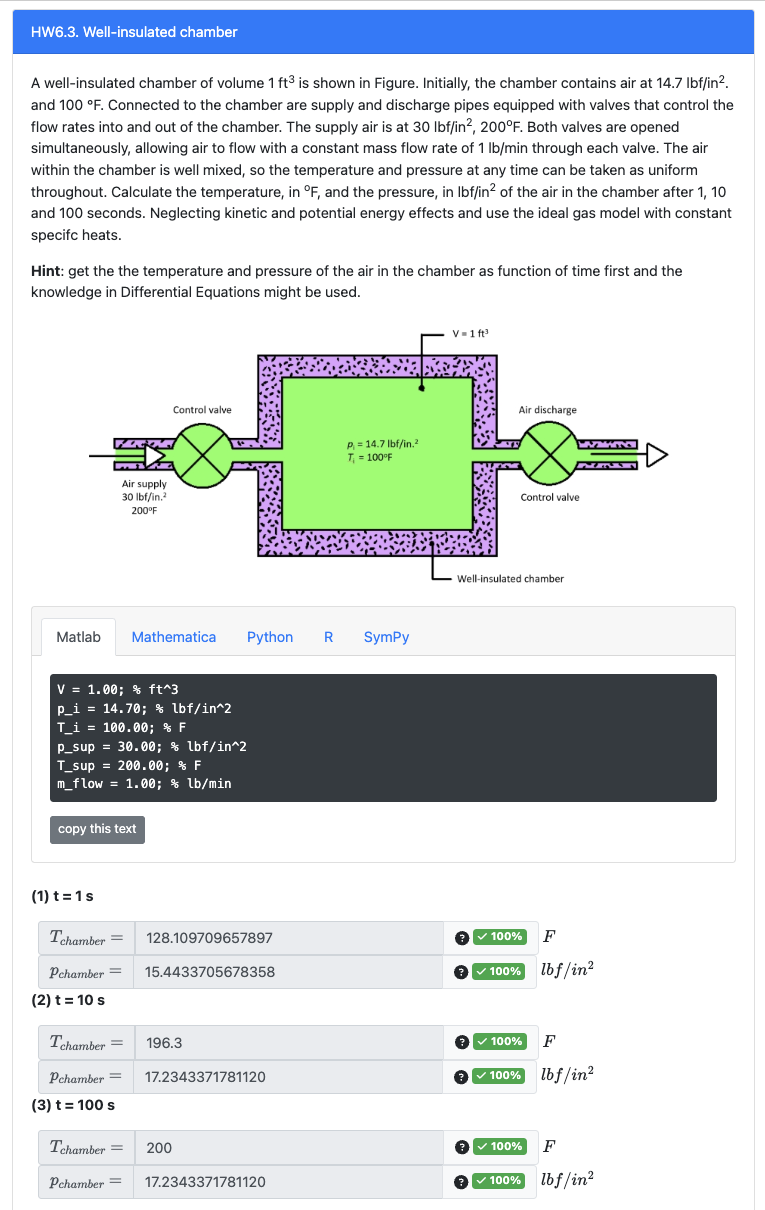

In [4]:
# 6.3
# 思路
# 还是简单的直接用第一定律推出来下面的式子
# T=(T_sup-T_i)*(1-exp(-a*t))+T_i
# p=m*53.35*T/144 

# 思路参照p208 209
# 这个题是本来是简单的微分方程 但是因为单位不是很熟练，所以会出现问题，但是总的来说最后的公式如上，就是简单的找到T和时间t的函数，然后


from sympy import *

V = 1.00 # ft^3
p_i = 14.70 # lbf/in^2
T_i = 100.00 # F
p_sup = 30.00 # lbf/in^2
T_sup = 200.00 # F
m_flow = 1.00 # lb/min
m_flow=m_flow/60

T_sup=T_sup+460
T_i=100+460 # R

R=1545/28.97 # ft*lbf/lb/duR
v1=R*T_i/p_i/144 # ft**3/lb

# print(v1)

m=V/v1 # lb

from sympy import *
t=S('t')
T=1-exp(-m_flow/m*t)+T_i
p=T*R/v1 


cp=0.24 # Btu/(lb*F)
cp=0.24*778 # ft*lbf/(lb*R)

cv=0.171*778
a=cp/cv*m_flow/m

t=1
T=(T_sup-T_i)*(1-exp(-a*t))+T_i
p=m*53.35*T/144/1
print(T-460,p)
# T*R/v1/144
# 1ft=144 in**in


t=10
T=(T_sup-T_i)*(1-exp(-a*t))+T_i
p=m*53.35*T/144/1
print(T-460,p)

t=100
T=(T_sup-T_i)*(1-exp(-a*t))+T_i
p=m*53.35*T/144/1
print(T-460,p)


128.109709657897 15.4433705678358
196.312751769067 17.2343371781120
200.000000000000 17.3311618689320


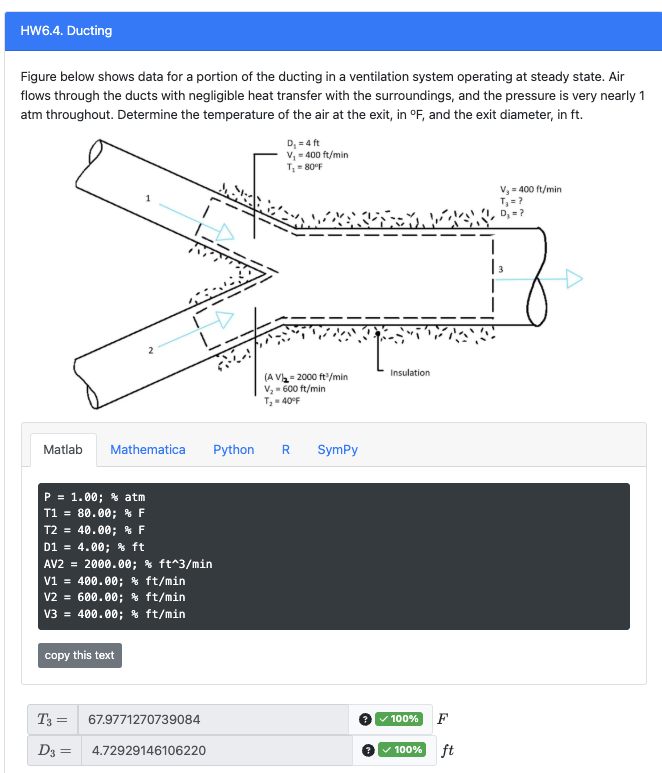

In [ ]:
# 6.4
# 思路
# 两个公式
# 在稳态流动中，入口体积流量之和等于出口体积流量 AV1+AV2=AV3
# 在等压条件下，质量流量与温度成反比（由理想气体定律 rou=P/R/T => AV1/T1+AV2/T2=AV3/T3

from sympy import *

P = 1.00 # atm
T1 = 80.00 # F
T2 = 40.00 # F
D1 = 4.00 # ft
AV2 = 2000.00 # ft^3/min
V1 = 400.00 # ft/min
V2 = 600.00 # ft/min
V3 = 400.00 # ft/min
# ===================
D3=S('D3')
A1=pi/4*D1**2
AV1=A1*V1
A3=D3**2/4*pi
AV3=A3*V3


q1=AV3-AV2-AV1
D3=solve(q1,D3)[1]
A3=D3**2/4*pi
AV3=A3*V3


T1=T1+459.67
T2=T2+459.67

T3=S('T3')
q2=AV1/T1+AV2/T2-AV3/T3
T3=solve(q2,T3)[0]-459.67
print(T3,D3)




67.9771270739084 4.72929146106220


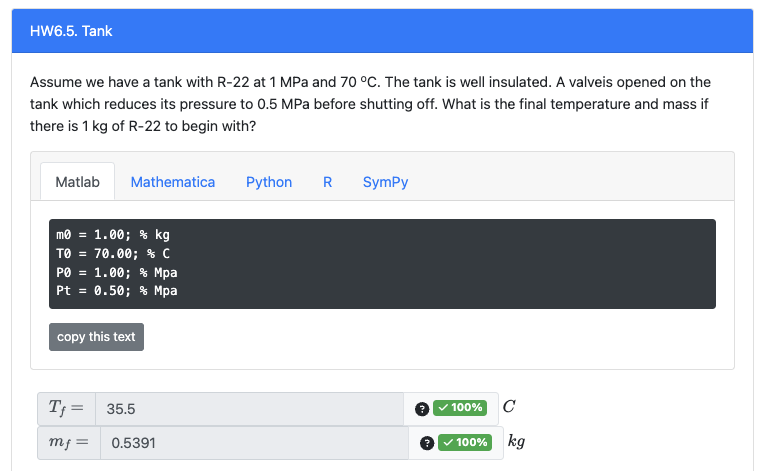

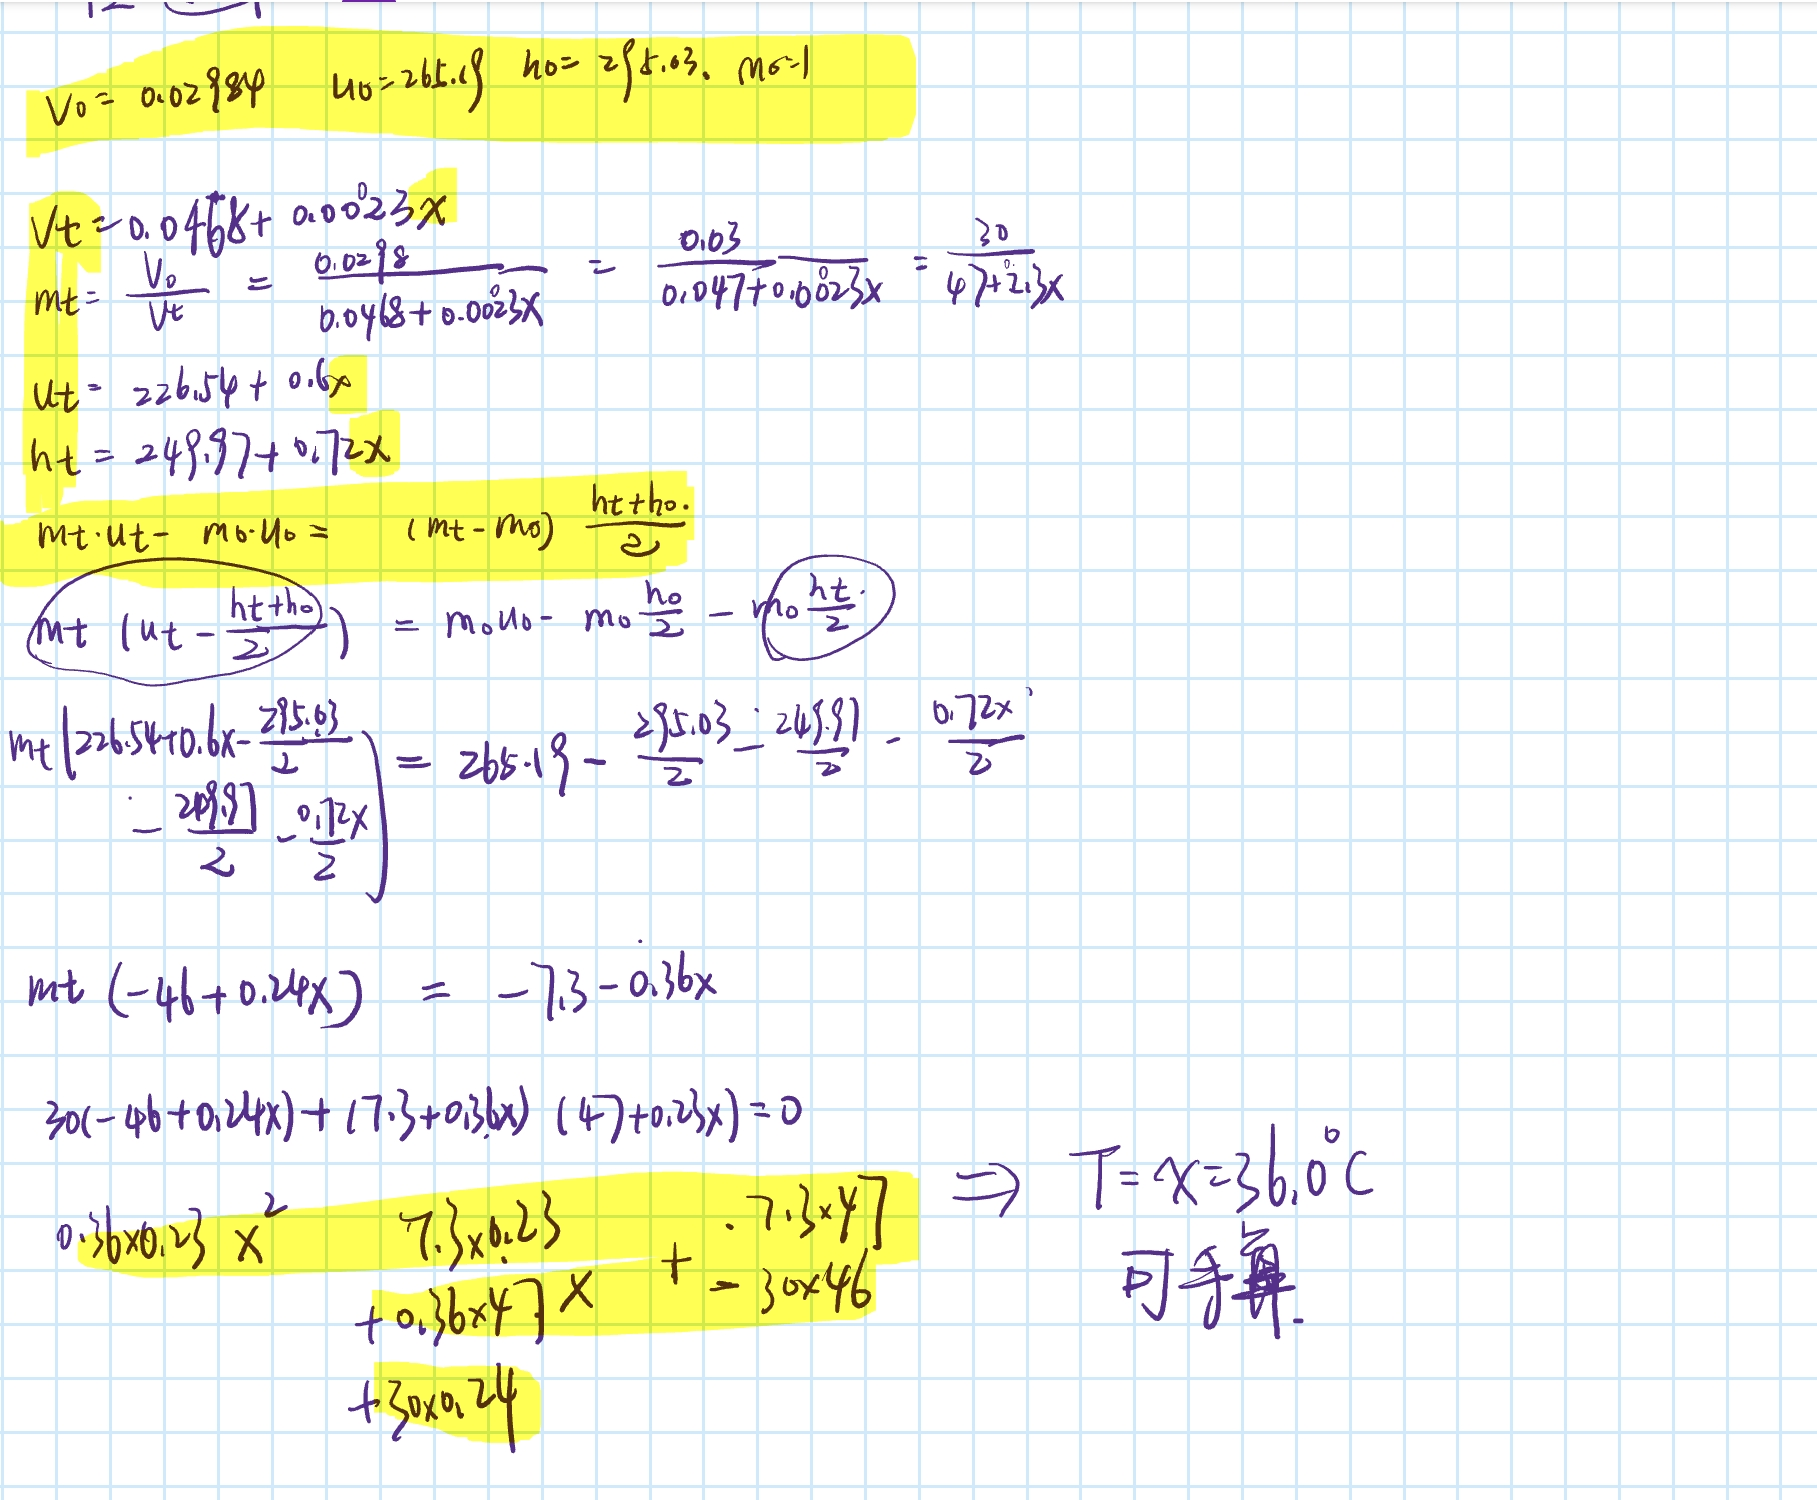

In [22]:
# 6.5

# 这道题彻底会了，首先用第一定律 建立vt ut的关系（要各种替换）
# mt*ut-m0*u0=(ht+h0)/2*(mt-m0)利用替换mt=V/vt,ht=ut+pt*vt
# ut=(pt*V-m0*ho+2*mo*uo-mo*pt*vt+V/vt*h0)/(V/vt+m0)




# 然后对着表开始试验，就是选定一个vt然后计算ut‘然后计算｜ut-ut'｜ 然后变化vt重新计算ut'然后计算｜ut-ut'｜
# ！！！！！表用的是p939 p=0.1mpa那张

# 有一个比较简单方便的方法是直接调用coolprop库，其实代码就类似下面一个单元格的内容 用fsolve函数逐渐缩小｜ut-ut'｜
# 可以看到输出就是越来越小
T=S('T')

vt=0.00023*(T-35)+0.05523

ut=0.6*(T-35)+247.66
ht=0.72*(T-35)+275.28
mt=0.02984/vt


u0=265.19
m0=1
h0=295.03

q1=ut*mt-u0*m0-(mt-m0)*(ht+h0)/2

solve([q1],[T])






[(-347.592397352333,), (35.5108756132022,)]